In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# TD2 : Méthode de Levenberg-Marquardt

## Cas mono-exponentiel

### Rappel des méthodes de descente de gradient et de Newton

- La méthode de descente du gradient d'ordre 1 offre des informations concernant la direction de la descente. Cette méthode est facile à implémenter et ne demande pas beaucoup de temps de calcul. On utilise plutôt cette méthode sur des fonctions fortement décroissantes. Pour des fonctions faiblement décroissantes, cette méthode nécessite beaucoup d'itérations pour converger vers un minimum local, ce qui peut être un problème.


- La méthode de Newton est une méthode d'ordre 2 qui donne des informations sur la courbure et la convexité de la fonction f au voisinage du point. Avec cette seconde méthode, le nombre d'itérations est plus faible qu'à l'ordre 1. Cependant, elle demande plus de temps de calcul car il faut calculer la Hessienne à chaque itération. De plus, la convergence n'est pas forcément vers un minimum : cette méthode ne fait pas de distinction entre maximum, minimum et point selle.

### Régression non-linéaire

On définit la fonction g(x) = exp(-ax), un jeu de données bruité (pour $x \in [0, 3]$, $a_1 = 2.0$).

In [2]:
def g (a,x):
    return np.exp(-a*x)

print("test g :",g(1,-5))

test g : 148.4131591025766


In [3]:
X = np.arange(0,3.01,0.01)
a = 2
Y = g(a,X)+0.01*np.random.randn(301,)

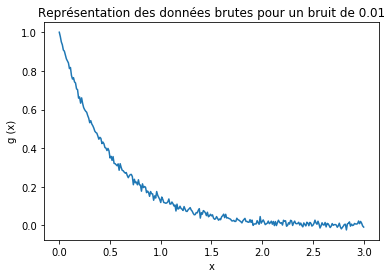

In [4]:
# Représentation des données
plt.plot(X,Y)
plt.xlabel('x')
plt.ylabel('g (x)')
plt.title('Représentation des données brutes pour un bruit de 0.01')
plt.show()

In [5]:
# Fonction de cout
def f (a,X,Y):
    return 0.5*sum((Y-g(a,X))**2)

print("test f :", f(2, X, Y))

test f : 0.016703939691254225


In [6]:
# Fonction gradient de f par rapport à a (qui est un paramètre). 
def grad (f, X, Y, a):
    return -sum((Y-g(a,X))*(-X*np.exp(-a*X)))

print("test grad :", grad(f, X, Y, a))

test grad : -0.010585266406618691


In [7]:
# Fonction dérivée d'ordre 2 de f (on dérive deux fois par rapport à a).
def d_2_f (X, a):
    return sum((X*X*np.exp(-2*a*X)))

print("test d_2_f : ", d_2_f(X, a))

test d_2_f :  3.123395405617489


In [8]:
# Algo de Levenberg-Marquardt 
def Lev_Mq_print (X, Y):
    a = 1.5
    lmb = 0.001
    nb_iter_max = 100
    cost = f( a, X, Y)
    G = grad(f,X,Y,a)
    for i in range(nb_iter_max):
        print("iter :",i,"; f =", cost,"; lambda =", lmb, "; a =", a, "; normG =", abs(G))
        G = grad(f,X,Y,a)
        d2f = d_2_f(X,a)
        HLM = np.array([d2f*(1+lmb)])
        dLM = -G/HLM
        new_cost = f(a+dLM, X, Y)
        if new_cost < cost:
            lmb *= 0.1
            cost = new_cost
            a += dLM
        else :
            lmb *= 10
        if lmb > 100:
            break
    return a

In [9]:
# Algo de Levenberg-Marquardt 
def Lev_Mq (X, Y):
    a = 1.5
    lmb = 0.001
    nb_iter_max = 100
    cost = f( a, X, Y)
    G = grad(f,X,Y,a)
    for i in range(nb_iter_max):
        G = grad(f,X,Y,a)
        d2f = d_2_f(X,a)
        HLM = np.array([d2f*(1+lmb)])
        dLM = -G/HLM
        new_cost = f(a+dLM, X, Y)
        if new_cost < cost:
            lmb *= 0.1
            cost = new_cost
            a += dLM
        else :
            lmb *= 10
        if lmb > 100:
            break
    return a

In [10]:
Y3 = g(a,X)+0.3*np.random.randn(301,)
Y4 = g(a,X)+0.1*np.random.randn(301,)
Y5 = g(a,X)+0.05*np.random.randn(301,)
Y6 = g(a,X)+0.01*np.random.randn(301,)

In [11]:
print('a = ', Lev_Mq_print(X, Y4)) # cas avec b = 0.1

iter : 0 ; f = 2.0435967727616617 ; lambda = 0.001 ; a = 1.5 ; normG = 2.722101622923197
iter : 1 ; f = 1.5462076539998364 ; lambda = 0.0001 ; a = [1.86939114] ; normG = 2.722101622923197
iter : 2 ; f = 1.5327173176342863 ; lambda = 1e-05 ; a = [1.95333312] ; normG = 0.32094446660162745
iter : 3 ; f = 1.5327009729654002 ; lambda = 1.0000000000000002e-06 ; a = [1.9564529] ; normG = 0.010458167618687219
iter : 4 ; f = 1.5327009728081629 ; lambda = 1.0000000000000002e-07 ; a = [1.9564626] ; normG = 3.236007821144117e-05
iter : 5 ; f = 1.5327009728081618 ; lambda = 1.0000000000000004e-08 ; a = [1.95646261] ; normG = 6.134396295494554e-08
iter : 6 ; f = 1.5327009728081618 ; lambda = 1.0000000000000004e-07 ; a = [1.95646261] ; normG = 1.1600509729247158e-10
iter : 7 ; f = 1.5327009728081618 ; lambda = 1.0000000000000004e-06 ; a = [1.95646261] ; normG = 1.1600509729247158e-10
iter : 8 ; f = 1.5327009728081618 ; lambda = 1.0000000000000004e-05 ; a = [1.95646261] ; normG = 1.1600509729247158e-1

### Evolution des paramètres de l’algorithme

La fonction de cout (f) conditionne la valeur de lambda. En effet, tant que f diminue, lambda diminue. 
Ainsi, lors des 6-8 premières itérations (environ), la valeur de f diminue. Une fois que f ne varie plus, lambda augmente pour atteindre la valeur limite (fixée ici à 100). 

On remarque que f atteint son minimum de manière rapide : seulement 2 itérations pour atteindre une valeur très proche de celle finalement retenue. 

Lorsqu'on regarde la norme du gradient, on voit que celle-ci diminue fortement, pour être inférieure 0.01 après seulement 3 itérations. Cela prouve que la convergence est rapide. 

Finalement, la valeur obtenue de a est proche (à 0.05 près) de la valeur initiale $a_{reel} = 2$.

### Condition d'arrêt

Il aurait été possible de choisir comme condition d'arrêt une valeur epsilon telle que si normG < epsilon, alors le programme s'arrête. J'ai néanmoins préféré mettre un nombre d'itérations maximal (ici 100) et une valeur limite pour lamdba (> 1e10). 

Ce choix me semble pertinent : lambda n'augmentera que lorsque le nouveau coût calculé sera plus grand que le précédent. Lorsqu'il n'y a pas de convergence, alors la nombre d'itérations maximal sera atteint.

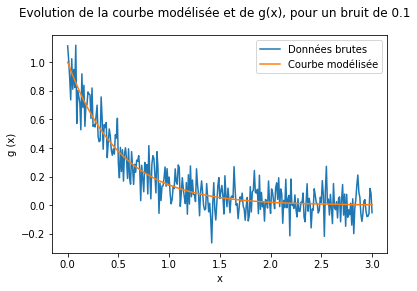

In [12]:
fig = plt.figure()
plt.plot(X,Y4, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.1')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g(Lev_Mq(X,Y4),X), label = "Courbe modélisée")
plt.legend()
plt.show()

### Amplitude du bruit et impact

Pour regarder l'impact du bruit sur la convergence, il faut regarder le nombre d'itérations nécessaires pour atteindre la convergence.

##### Cas b = 0.3

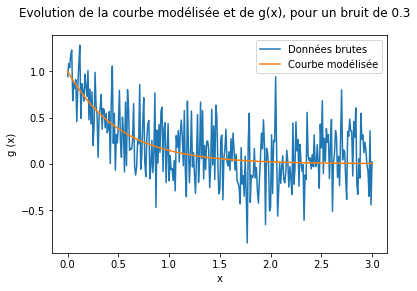

In [13]:
fig = plt.figure()
plt.plot(X,Y3, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.3')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g(Lev_Mq(X,Y3),X), label = "Courbe modélisée")
plt.legend()
plt.show()

Pour un bruit de 0.3, il est difficile pour le programme d'approximer correctement la fonction g. Sur le graphique, on peut voir que g(x) varie fortement pour certains x. On obtient a = 1.86, ce qui est déjà plus éloigné que pour b = 0.1. 

Le coût maximal est atteint après 7-8 itérations, ce qui est presque aussi rapide que pour un bruit de 0.1. La rapidité de la convergence ne garantit pas précision dans l'estimation !

In [14]:
print('a = ', Lev_Mq_print(X, Y3)) # cas avec b = 0.3

iter : 0 ; f = 13.192887914023874 ; lambda = 0.001 ; a = 1.5 ; normG = 2.571278363072323
iter : 1 ; f = 12.738194568211938 ; lambda = 0.0001 ; a = [1.84892431] ; normG = 2.571278363072323
iter : 2 ; f = 12.723301525502425 ; lambda = 1e-05 ; a = [1.93491011] ; normG = 0.33976108774858926
iter : 3 ; f = 12.723257925929163 ; lambda = 1.0000000000000002e-06 ; a = [1.93989171] ; normG = 0.017179880770351118
iter : 4 ; f = 12.723257907055773 ; lambda = 1.0000000000000002e-07 ; a = [1.93999576] ; normG = 0.0003560806384715092
iter : 5 ; f = 12.723257907049076 ; lambda = 1.0000000000000004e-08 ; a = [1.93999772] ; normG = 6.707445183955105e-06
iter : 6 ; f = 12.72325790704907 ; lambda = 1.0000000000000005e-09 ; a = [1.93999776] ; normG = 1.2607653346365382e-07
iter : 7 ; f = 12.72325790704907 ; lambda = 1.0000000000000005e-08 ; a = [1.93999776] ; normG = 2.36969350118541e-09
iter : 8 ; f = 12.72325790704907 ; lambda = 1.0000000000000005e-07 ; a = [1.93999776] ; normG = 2.36969350118541e-09
ite

##### Cas b = 0.05

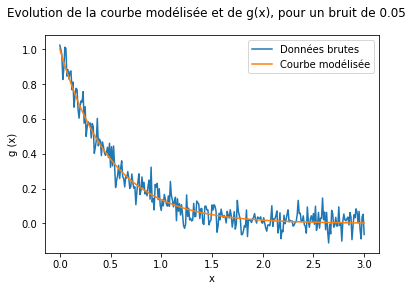

In [15]:
fig = plt.figure()
plt.plot(X,Y5, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.05')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g(Lev_Mq(X,Y5),X), label = "Courbe modélisée")
plt.legend()
plt.show()

In [16]:
print('a = ', Lev_Mq_print(X, Y5)) # cas avec b = 0.05

iter : 0 ; f = 0.9778424402642485 ; lambda = 0.001 ; a = 1.5 ; normG = 2.9193912847638317
iter : 1 ; f = 0.4091972619092488 ; lambda = 0.0001 ; a = [1.89616348] ; normG = 2.9193912847638317
iter : 2 ; f = 0.3928996911938772 ; lambda = 1e-05 ; a = [1.99077978] ; normG = 0.34669244628643875
iter : 3 ; f = 0.39288471373538414 ; lambda = 1.0000000000000002e-06 ; a = [1.99386548] ; normG = 0.009772251404947446
iter : 4 ; f = 0.3928847132884816 ; lambda = 1.0000000000000002e-07 ; a = [1.99384859] ; normG = 5.325769409173409e-05
iter : 5 ; f = 0.39288471328846175 ; lambda = 1.0000000000000004e-08 ; a = [1.9938487] ; normG = 3.5468018797077047e-07
iter : 6 ; f = 0.39288471328846175 ; lambda = 1.0000000000000004e-07 ; a = [1.9938487] ; normG = 2.3600453877411706e-09
iter : 7 ; f = 0.39288471328846175 ; lambda = 1.0000000000000004e-06 ; a = [1.9938487] ; normG = 2.3600453877411706e-09
iter : 8 ; f = 0.3928847132884617 ; lambda = 1.0000000000000005e-07 ; a = [1.9938487] ; normG = 2.36004538774117

En prenant un bruit plus faible, on voit que la valeur obtenue pour a se rapproche encore plus de la réelle (1.98 proche de 2). La convergence de l'algorithme est cette fois-ci plus rapide : on atteint la valeur optimale au bout de 5 itérations environ. 

Pour résumer, plus on diminue le bruit, plus l'algorithme prédit une valeur de a proche de la réelle. La convergence est également légèrement plus rapide lorsque les bruits sont faibles (b =< 0.05), mais il faut toujours 3-4 itérations à l'algorithme pour atteindre la fonction de coût minimale.

## Cas bi-exponentiel

In [17]:
def g_bi (a,x):
    return (x**a[0])*np.exp(-a[1]*x)

In [18]:
X = np.arange(0.01,5.001,0.01)
a = np.array([2,3])
Y = g_bi(a,X)+0.01*np.random.randn(500,)
print(Y)
print(a)
print(g_bi(a,2))

[-1.70203642e-02  5.10550316e-04 -5.01144868e-03 -4.47467772e-03
  7.78668843e-03  8.32030816e-03  8.86983392e-03  1.50512473e-02
  9.11326659e-03  2.47388611e-03 -1.33039754e-03  1.57259539e-02
  5.55784451e-03  1.69850706e-02  1.95991560e-02  1.96956976e-03
  2.17381336e-02  1.49044747e-02  1.87906613e-02  2.73269535e-02
  2.87515301e-02  3.13730882e-02  4.53563283e-02  3.13542759e-02
  2.52569912e-02  3.39304420e-02  3.60847761e-02  4.07992702e-02
  2.47081388e-02  3.39681731e-02  4.16060648e-02  4.40949678e-02
  3.89066079e-02  5.93232262e-02  3.35707684e-02  4.52226461e-02
  4.87162344e-02  4.98774833e-02  5.07652677e-02  3.51851990e-02
  3.48582328e-02  4.94465771e-02  4.13749108e-02  5.47485861e-02
  5.01223719e-02  4.78324604e-02  5.73979860e-02  4.21692744e-02
  6.52447088e-02  5.37939296e-02  4.54748507e-02  4.79428791e-02
  6.79753781e-02  5.52973391e-02  5.09565040e-02  6.30172791e-02
  6.86962780e-02  6.01466404e-02  5.89620244e-02  6.74927591e-02
  6.96049950e-02  6.63950

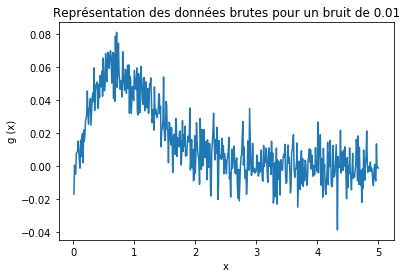

In [19]:
plt.plot(X,Y)
plt.xlabel('x')
plt.ylabel('g (x)')
plt.title('Représentation des données brutes pour un bruit de 0.01')
plt.show()

In [20]:
# Fonction de cout
def f_bi (a,X,Y):
    return 0.5*sum((Y-g_bi(a,X))**2)

print("test f :", f_bi(a, X, Y))

test f : 0.024727585189257367


In [21]:
# Fonction gradient de f par rapport à a (qui est un paramètre). 
def grad_bi (X, Y, a):
    da1 = -sum((Y-g_bi(a,X))*(np.log(X)*(X**a[0])*np.exp(-a[1]*X)))
    da2 = -sum((Y-g_bi(a,X))*(-X*(X**a[0])*np.exp(-a[1]*X)))
    return np.array([da1,da2])

print("test grad :", grad_bi(X, Y, a))

test grad : [-0.00041256 -0.0039218 ]


In [22]:
# Dérivé partielle de g par rapport à a1 : 
def derive_g1(x,a):
    return np.log(x)*g_bi(a,x)


# Dérivé partielle de g par rapport à a2 : 
def derive_g2(x,a):
    return -x*g_bi(a,x)

# Matrice des dérivées d’ordre 2 de f
def d_2_f_bi(X, a):
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 0
    for i in range(len(X)):
        s1 += derive_g1(X[i], a)**2
        s2 += derive_g1(X[i], a) * derive_g2(X[i], a)
        s3 += derive_g2(X[i], a) * derive_g1(X[i], a)
        s4 += derive_g2(X[i], a)**2
    return np.array([[s1, s3],[s2, s4]])


def norm1_grad2(X, Y, a):
    return abs(grad_bi(X, Y, a))[0] + abs(grad_bi(X, Y, a))[1]

print("test d_2_f :", d_2_f_bi(X, a))

test d_2_f : [[0.09349203 0.02202722]
 [0.02202722 0.25720162]]


In [23]:
# Algo de Levenberg-Marquardt 
def Lev_Mq_bi_print (X, Y):
    a = np.array([1.5,1.5])
    lmb = 0.01
    nb_iter_max = 200
    cost = f_bi( a, X, Y)
    G = grad_bi(X,Y,a)
    normG = (G[0]**2+G[1]**2)**(1/2)
    for i in range(nb_iter_max):
        print("iter :",i,"; f =", cost,"; lambda =", lmb, "; a =", a, "; normG =", normG)
        G = grad_bi(X,Y,a)
        normG = (G[0]**2+G[1]**2)**(1/2)
        d2f = d_2_f_bi(X,a)
        Mat_lmb = np.array([[1+lmb, 1], [1, 1+lmb]])
        HLM = d2f*Mat_lmb # On multiplie terme par terme. 
        dLM = -np.dot(np.transpose(G),np.linalg.inv(HLM))
        new_cost = f_bi(a+dLM, X, Y)
        if new_cost < cost:
            lmb *= 0.1
            cost = new_cost
            a += dLM
        else :
            lmb *= 10
        if lmb > 100:
            break
    return a

In [28]:
# Algo de Levenberg-Marquardt 
def Lev_Mq_bi (X, Y):
    a = np.array([1.5,1.5])
    lmb = 0.001
    nb_iter_max = 200
    cost = f_bi( a, X, Y)
    G = grad_bi(X,Y,a)
    normG = (G[0]**2+G[1]**2)**(1/2)
    for i in range(nb_iter_max):
        G = grad_bi(X,Y,a)
        normG = (G[0]**2+G[1]**2)**(1/2)
        d2f = d_2_f_bi(X,a)
        Mat_lmb = np.array([[1+lmb, 1], [1, 1+lmb]])
        HLM = d2f*Mat_lmb # On multiplie terme par terme. 
        dLM = -np.dot(np.transpose(G),np.linalg.inv(HLM))
        new_cost = f_bi(a+dLM, X, Y)
        if new_cost < cost:
            lmb *= 0.1
            cost = new_cost
            a += dLM
        else :
            lmb *= 10
        if lmb > 10:
            break
    return a

In [25]:
Y1 = g_bi(a,X)+0.1*np.random.randn(500,)
Y2 = g_bi(a,X)+0.001*np.random.randn(500,)
Y3 = g_bi(a,X)+0.01*np.random.randn(500,)

In [26]:
a_ = Lev_Mq_bi_print(X, Y3)
print("a1 = ", a_[0], '\na2 = ', a_[1])

iter : 0 ; f = 2.567502505533232 ; lambda = 0.01 ; a = [1.5 1.5] ; normG = 8.655798164036934
iter : 1 ; f = 0.34669443693520396 ; lambda = 0.001 ; a = [2.07213391 2.15449504] ; normG = 8.655798164036934
iter : 2 ; f = 0.05273669230534447 ; lambda = 0.0001 ; a = [2.27470809 2.66644883] ; normG = 1.3296084537332487
iter : 3 ; f = 0.02556938720552882 ; lambda = 1e-05 ; a = [2.1235419  2.93448473] ; normG = 0.19308658982354315
iter : 4 ; f = 0.024470263178932028 ; lambda = 1.0000000000000002e-06 ; a = [2.04973603 3.0114763 ] ; normG = 0.024069524236696484
iter : 5 ; f = 0.02446728546707299 ; lambda = 1.0000000000000002e-07 ; a = [2.04755556 3.01633612] ; normG = 0.001192437218258615
iter : 6 ; f = 0.024467285369862063 ; lambda = 1.0000000000000004e-08 ; a = [2.04760345 3.01632788] ; normG = 4.082657247498986e-06
iter : 7 ; f = 0.024467285369846402 ; lambda = 1.0000000000000005e-09 ; a = [2.04760287 3.01632805] ; normG = 5.587776183427559e-08
iter : 8 ; f = 0.024467285369846378 ; lambda = 1

Dans cet exemple, j'ai choisi un bruit de 0,01. On observe de nombreuses similarités avec le cas mono-exponentiel. 

Le paramètre $\lambda$ diminue pendant 9-10 itérations, puis augmente. Le calcul de la norme 2 à chaque itération permet à nouveau de mettre en évidence la convergence de l'algorithme. Cette norme semble divisée par presque 100 d'une itération à l'autre durant toute la période où lambda diminue. 

Finalement, la convergence est rapide et le $a$ estimé est très proche du $a$ réel. 

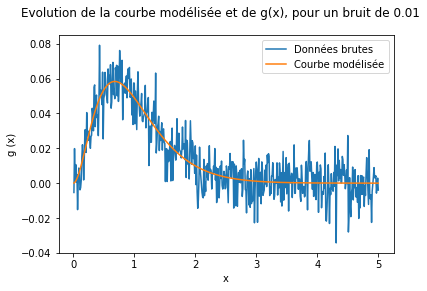

In [31]:
fig = plt.figure()
plt.plot(X,Y3, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.01')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g_bi(Lev_Mq_bi(X,Y3),X), label = "Courbe modélisée")
plt.legend()
plt.show()

### Evolution des paramètres de l’algorithme

#### Cas b = 0.001

In [32]:
a_ = Lev_Mq_bi_print(X, Y2)
print("a1 = ", a_[0], '\na2 = ', a_[1])

iter : 0 ; f = 2.522059486183268 ; lambda = 0.01 ; a = [1.5 1.5] ; normG = 8.633964715294514
iter : 1 ; f = 0.3198390252891778 ; lambda = 0.001 ; a = [2.05946855 2.14999577] ; normG = 8.633964715294514
iter : 2 ; f = 0.028610814868526246 ; lambda = 0.0001 ; a = [2.24235688 2.65526156] ; normG = 1.327562007596128
iter : 3 ; f = 0.0014160041835682938 ; lambda = 1e-05 ; a = [2.08031733 2.91934467] ; normG = 0.19344284731880151
iter : 4 ; f = 0.00027522258211875965 ; lambda = 1.0000000000000002e-06 ; a = [2.00514484 2.99633891] ; normG = 0.024523005828000512
iter : 5 ; f = 0.00027134166071374443 ; lambda = 1.0000000000000002e-07 ; a = [2.00173339 3.00169838] ; normG = 0.0013340844777510455
iter : 6 ; f = 0.0002713415913347919 ; lambda = 1.0000000000000004e-08 ; a = [2.00171558 3.0017206 ] ; normG = 5.431331899970504e-06
iter : 7 ; f = 0.00027134159133475864 ; lambda = 1.0000000000000005e-09 ; a = [2.00171556 3.00172061] ; normG = 2.6230616365402705e-09
iter : 8 ; f = 0.00027134159133475826

Avec un bruit de 0.001, l'algorithme agit comme avec b = 0.01. La convergence est légèrement plus rapide et l'approximation de $a$ est encore meilleure : $a_{est}$ = [2.002, 3.002] pour $a_{reel}$ = [2,3].

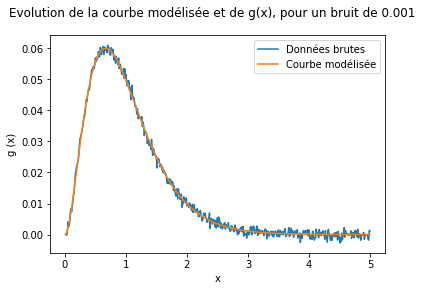

In [38]:
fig = plt.figure()
plt.plot(X,Y2, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.001')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g_bi(Lev_Mq_bi(X,Y2),X), label = "Courbe modélisée")
plt.legend()
plt.show()

#### Cas b = 0.05

In [39]:
Y4 = g_bi(a,X)+0.05*np.random.randn(500,)
a_ = Lev_Mq_bi_print(X, Y4)
print("a1 = ", a_[0], '\na2 = ', a_[1])

iter : 0 ; f = 2.8856903490607673 ; lambda = 0.01 ; a = [1.5 1.5] ; normG = 8.324185083591505
iter : 1 ; f = 0.8867820471780193 ; lambda = 0.001 ; a = [1.96111589 2.10676421] ; normG = 8.324185083591505
iter : 2 ; f = 0.6377728533577343 ; lambda = 0.0001 ; a = [2.02386926 2.54225335] ; normG = 1.2707963466985843
iter : 3 ; f = 0.6178652058095669 ; lambda = 1e-05 ; a = [1.870907   2.74221102] ; normG = 0.17920706933013075
iter : 4 ; f = 0.6173829617669531 ; lambda = 1.0000000000000002e-06 ; a = [1.83263632 2.78368375] ; normG = 0.019183884195061306
iter : 5 ; f = 0.6173822708767054 ; lambda = 1.0000000000000002e-07 ; a = [1.83037645 2.78500804] ; normG = 0.0005764833801644981
iter : 6 ; f = 0.6173822701240894 ; lambda = 1.0000000000000004e-08 ; a = [1.83028023 2.78501076] ; normG = 1.51626373726604e-05
iter : 7 ; f = 0.6173822701227115 ; lambda = 1.0000000000000005e-09 ; a = [1.8302761  2.78501108] ; normG = 6.396912058175941e-07
iter : 8 ; f = 0.6173822701227087 ; lambda = 1.0000000000

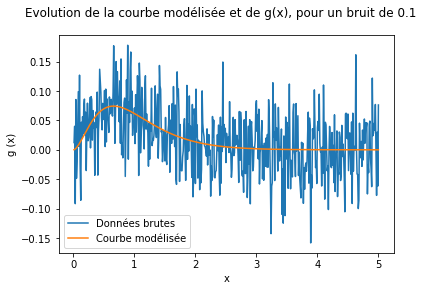

In [40]:
fig = plt.figure()
plt.plot(X,Y4, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.1')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g_bi(Lev_Mq_bi(X,Y4),X), label = "Courbe modélisée")
plt.legend()
plt.show()

Pour b = 0.05, la convergence devient approximative. Les coordonnées de a obtenues sont plus éloignées des réelles ($a_{est}$ = [2.002, 3.002] pour le même $a$ réel). L'algorithme a trouvé le a optimal après 12 itérations.

#### Cas b = 0.1

In [41]:
a_ = Lev_Mq_bi_print(X, Y1)
print("a1 = ", a_[0], '\na2 = ', a_[1])

iter : 0 ; f = 5.237605566007287 ; lambda = 0.01 ; a = [1.5 1.5] ; normG = 8.87592464013745
iter : 1 ; f = 3.00507190142167 ; lambda = 0.001 ; a = [1.99889677 2.14882028] ; normG = 8.87592464013745
iter : 2 ; f = 2.726286391312316 ; lambda = 0.0001 ; a = [2.07549774 2.64255296] ; normG = 1.2930371681895083
iter : 3 ; f = 2.70347760570513 ; lambda = 1e-05 ; a = [1.89697974 2.89375034] ; normG = 0.1722674214684862
iter : 4 ; f = 2.7029640801623533 ; lambda = 1.0000000000000002e-06 ; a = [1.87325256 2.95124329] ; normG = 0.018016719079355623
iter : 5 ; f = 2.702963114916961 ; lambda = 1.0000000000000002e-07 ; a = [1.87734079 2.95165767] ; normG = 0.0005776405413011995
iter : 6 ; f = 2.702963095812066 ; lambda = 1.0000000000000004e-08 ; a = [1.87672349 2.9517719 ] ; normG = 7.26585130694962e-05
iter : 7 ; f = 2.702963095308267 ; lambda = 1.0000000000000005e-09 ; a = [1.87682332 2.95175132] ; normG = 1.1801497696087948e-05
iter : 8 ; f = 2.7029630952949923 ; lambda = 1.0000000000000006e-10 

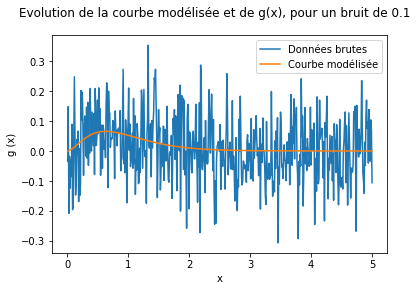

In [42]:
fig = plt.figure()
plt.plot(X,Y1, label = "Données brutes")
fig.suptitle('Evolution de la courbe modélisée et de g(x), pour un bruit de 0.1')
plt.xlabel('x')
plt.ylabel('g (x)')
plt.plot(X,g_bi(Lev_Mq_bi(X,Y1),X), label = "Courbe modélisée")
plt.legend()
plt.show()

## Conclusions et analyse

- La méthode de Newton est beaucoup plus sensible au bruit en dimension 2 qu'en dimension 1. En bi-exponentiel, les estimations sont très approximatifs pour b >= 0,05 tandis que les estimations restent corrects jusqu'à b < 0,3. Bien entendu, cela dépend de la précision que l'on souhaite (estimer 1.9 pour une vraie valeur de 2, est-ce une bonne estimation ? Cela dépend des cas). 

- Le nombre d'itérations est plus élevé pour le cas bi-exponentiel, cela s'explique par une fonction plus complexe car il y a 2 coordonnées à déterminer. D'une manière générale, cette méthode converge rapidement, notamment grâce à l'utilisation de la méthode de descente du gradient dans un premier temps (qui permet de converger rapidement), puis de la méthode de Newton (via le paramètre lambda) pour estimer précisément au voisinage du point a. 

- On a ici utilisé l'approximation de la Hessienne par la méthode de Gauss-Newton, permettant de ne pas calculer de dérivés secondes ; cette méthode est donc moins coûteuse en termes de calculs que la méthode de Newton.

# TD3 : Algorithme génétique

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics

In [44]:
# Generate genome
def generate_genome (T):
    seq = [-1,1]
    genome = []
    for i in range(T):
        genome.append(random.choice(seq))
    return genome

genome = generate_genome(10)

In [45]:
# Cost function
def cost (genome, r0):
    cost_estimated = 0
    walk = 0
    for i in range(len(genome)):
        walk += genome[i]
        if (walk > r0) or (walk < -r0) : 
            cost_estimated += 1
    return cost_estimated

cost_gen = cost(genome, 1)

In [46]:
# Initialisation of population
def generate_pop (N, T):
    pop = []
    for i in range(N):
        pop.append(generate_genome(T))
    return pop

pop = generate_pop(5,4)

In [47]:
# Sort the genomes
def sort_genome (pop, r0):
    list_cost = []
    pop_sort = []
    for genome in pop:
        list_cost.append(cost(genome, r0))
    list_cost = np.argsort(list_cost) 
    # Trié par ordre croissant par défaut, donc avec le reversed : 
    # C'est d'abord la valeur avec la fonction de cout la plus forte. 
    for i in reversed(range(len(list_cost))):
        pop_sort.append(pop[list_cost[i]])
    return pop_sort

pop_sort = sort_genome(pop, 1)

In [48]:
# Selection of genomes with high cost function
def select_genomes (pop):
    N = len(pop)
    Ns = N//2 # Entier inférieur
    return pop[0:Ns]
pop_highest_genomes = select_genomes(pop_sort)

In [49]:
# Genome mutation
def generate_mutation(pop, Tm):
    for i in range(len(pop)):
        for j in range(len(pop[0])):
            if Tm > random.random():
                pop[i][j] *= -1
                
generate_mutation(pop_highest_genomes, 0.8)

In [50]:
# Crossing-Over
def generate_crossing_over (pop, Tc):
    for i1 in range(len(pop)):
        if Tc > random.random():
            j = random.randint(0,len(pop[0])-1) # Prendre un gène au hasard dans mon génome
            temp = pop[i1][j:]
            # Aller chercher un autre gène à échanger. 
            i2 = i1
            while i2 == i1: 
                i2 = random.randint(0, len(pop)-1)
            pop[i1][j:] = pop[i2][j:]
            pop[i2][j:] = temp
generate_crossing_over(pop_highest_genomes, 0.8)

In [51]:
def calcul_mean_cost (pop, r0):
    new_list_cost = []
    for genome in pop:
        new_list_cost.append(cost(genome, r0))
    return statistics.mean(new_list_cost)

In [52]:
def calcul_min_cost (pop, r0):
    new_list_cost = []
    for genome in pop:
        new_list_cost.append(cost(genome, r0))
    return min(new_list_cost)

In [53]:
# Increment one generation
def one_generation (pop, Tc, Tm, counter, r0):
    pop_sort = sort_genome(pop, r0)
    pop_highest_genomes = select_genomes(pop_sort)
    pop_lowest_genomes = pop_sort[len(pop_highest_genomes):len(pop_sort)]
    generate_mutation(pop_highest_genomes, Tm)
    generate_crossing_over(pop_highest_genomes, Tc)
    pop = pop_highest_genomes+pop_lowest_genomes
    counter += 1
    mean_cost = calcul_mean_cost(pop, r0)
    min_cost = calcul_min_cost(pop, r0)
    return (pop, counter, mean_cost, min_cost)

In [54]:
r0 = 4
T = 500
N = 100
Tm = 0.05
Tc = 0.1

def main(T, N, r0, Tm, Tc):
    counter = 0
    pop = generate_pop(N,T)
    (pop, counter, mean_cost, min_cost) = one_generation(pop, Tc, Tm, counter, r0)
    tab_avg_cost = [mean_cost]
    tab_min_cost = [min_cost]
    while (min_cost != 0) and (counter < 200):
        (pop, counter, mean_cost, min_cost) = one_generation(pop, Tc, Tm, counter, r0)
        tab_avg_cost.append(mean_cost)
        tab_min_cost.append(min_cost)
    return (tab_avg_cost, tab_min_cost)

tab_avg_cost, tab_min_cost = main(T, N, r0, Tm, Tc)

for i in range(len(tab_avg_cost)):
    print("iter :",i,"; mean =", tab_avg_cost[i],"; min =", tab_min_cost[i])

iter : 0 ; mean = 353.62 ; min = 113
iter : 1 ; mean = 335.76 ; min = 113
iter : 2 ; mean = 314.03 ; min = 113
iter : 3 ; mean = 310.3 ; min = 113
iter : 4 ; mean = 304.88 ; min = 113
iter : 5 ; mean = 308.78 ; min = 113
iter : 6 ; mean = 291.25 ; min = 113
iter : 7 ; mean = 292.15 ; min = 113
iter : 8 ; mean = 282.88 ; min = 113
iter : 9 ; mean = 285.59 ; min = 113
iter : 10 ; mean = 293.11 ; min = 113
iter : 11 ; mean = 279.55 ; min = 113
iter : 12 ; mean = 273.69 ; min = 113
iter : 13 ; mean = 283.69 ; min = 113
iter : 14 ; mean = 279.81 ; min = 113
iter : 15 ; mean = 279.74 ; min = 113
iter : 16 ; mean = 273.8 ; min = 113
iter : 17 ; mean = 262.57 ; min = 113
iter : 18 ; mean = 271.66 ; min = 113
iter : 19 ; mean = 271.75 ; min = 113
iter : 20 ; mean = 273.15 ; min = 113
iter : 21 ; mean = 265.2 ; min = 113
iter : 22 ; mean = 269.77 ; min = 113
iter : 23 ; mean = 264.52 ; min = 113
iter : 24 ; mean = 266.19 ; min = 113
iter : 25 ; mean = 266.1 ; min = 113
iter : 26 ; mean = 271.51 

Coût moyen final :  227.67
Coût minimal final :  60.0


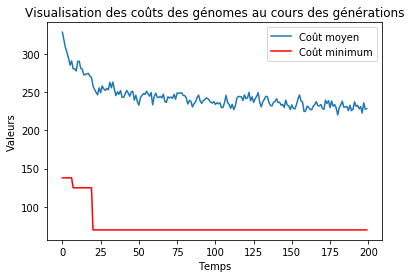

In [55]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, Tm, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])

print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts des génomes au cours des générations")
plt.legend()
plt.show()

### Critère d'arret

Le premier critère d'arret choisi est min_cost = 0. En effet, le but est d'obtenir un individu ayant un cout minimal, c'es-à-dire un coût nul. 

Cependant, cet individu étant difficilement obtenu, on prend également un nombre maximal d'itérations. Autrement, l'algorithme pourrait tourner très longtemps sans trouver d'individu parfait. On prendra nb_iter = 200 par exemple.

### Variation des paramètres (Tm, Tc, N, r0)

Chaque simulation a une grande part due à l'aléatoire. Pour limiter l'importance de ce phénomène dans les conclusions, j'ai répété chaque simulation 5 fois et j'ai retenu la moyenne de ces simulations (pour le coût moyen final et le coût minimal final). Il n'est pas possible de répéter chaque simulation un trop grand nombre de fois car on se retrouve rapidement limité par le temps de calcul. 

#### Influence de Tc

Coût moyen final :  225.296
Coût minimal final :  56.0


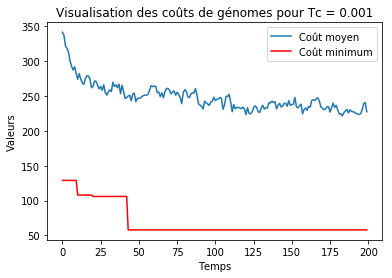

In [56]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, Tm, 0.001)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour Tc = 0.001")
plt.legend()
plt.show()

Coût moyen final :  231.454
Coût minimal final :  52.6


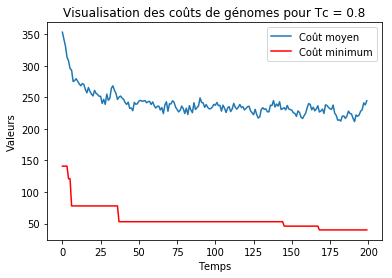

In [191]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, Tm, 0.8)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour Tc = 0.8")
plt.legend()
plt.show()

Nous pouvons voir ci-dessus deux simulations, avec des valeurs de Tc différentes. Si nous comparons le coût minimal et le coût moyen entre un Tc grand (0.8) et un Tc petit (0.001), on observe que les valeurs obtenues sont très similaires. L'impact du taux de crossing over est donc faible. De plus, les oscillations ont des amplitudes aussi importantes pour les deux valeurs de Tc testées.  

Lorsqu'il y a crossing over à partir d'une position donnée dans le génome, tous les gènes situés après cette position sur le chromosome sont déplacés vers un autre individu. La modification du génome est donc importante. Nous aurions donc pu penser que les crossing over favorisent l'apparition d'individus fortement différents des autres et donc potentiellement meilleurs que les autres. Avec cette logique, augmenter Tc favorise la baisse du coût minimal. Finalement, nous n'observons pas ce phénomène. 

#### Influence de Tm

Coût moyen final :  271.06399999999996
Coût minimal final :  97.6


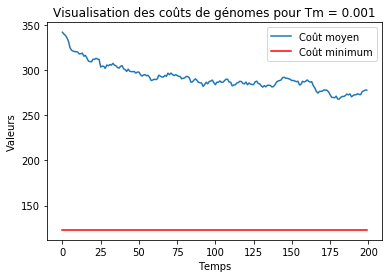

In [57]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, 0.001, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour Tm = 0.001")
plt.legend()
plt.show()

Coût moyen final :  230.996
Coût minimal final :  54.8


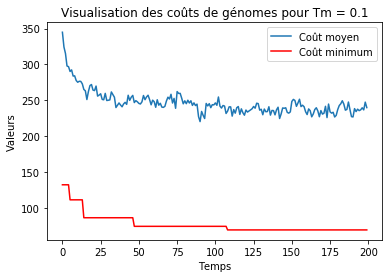

In [196]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, 0.1, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour Tm = 0.1")
plt.legend()
plt.show()

Coût moyen final :  232.762
Coût minimal final :  49.2


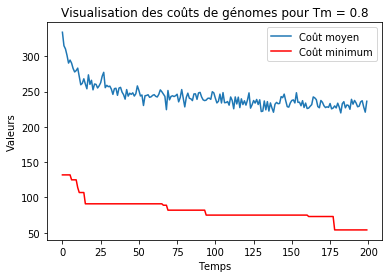

In [197]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, 0.8, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour Tm = 0.8")
plt.legend()
plt.show()

Coût moyen final :  235.58200000000002
Coût minimal final :  55.4


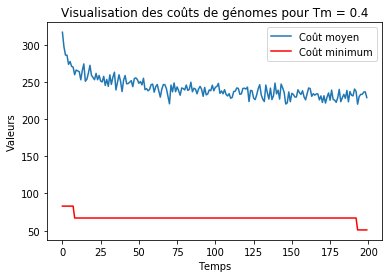

In [198]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, r0, 0.5, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour Tm = 0.4")
plt.legend()
plt.show()

Le paramètre Tm joue un rôle dans la détermination du coup minimal. Pour des valeurs trop petites de Tm (de l'ordre de 0.001), le coût minimal final reste vers 90. De même, le coût moyen est assez élevé. En revanche, pour Tm >= 0.1, le coût minimal est d'environ 45. Pour des valeurs élevées (Tm = 0,4-0,8), le coût minimal n'est pas plus faible. Enfin, la visualisation des oscillations semble similaire dans les cas où Tm > 0.1 (il n'y a presque pas d'oscillations quand Tm est trop faible car la population varie peu).

Une mutation agissant sur un seul gène d'un individu, il est très difficile qu'un inidividu au fort coût devienne le meilleur individu avec cette simple mutation. Comme seuls les inidividus au coût fort sont mutés, il est logique de ne pas observer de différence dans la valeur de coût minimal. 

#### Influence de r0

Coût moyen final :  168.238
Coût minimal final :  8.0


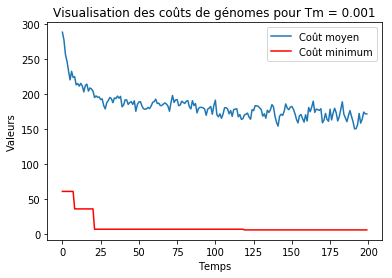

In [199]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, 6, Tm, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour r0 = 6")
plt.legend()
plt.show()

Coût moyen final :  320.788
Coût minimal final :  161.4


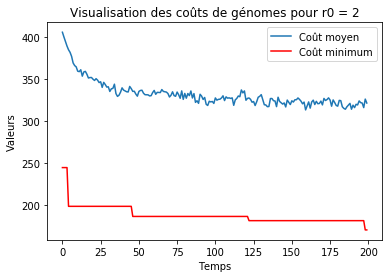

In [202]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, 2, Tm, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour r0 = 2")
plt.legend()
plt.show()

Coût moyen final :  146.29000000000002
Coût minimal final :  0.0


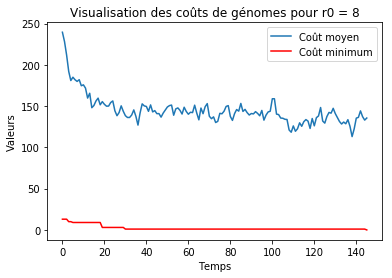

In [59]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, N, 8, Tm, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour r0 = 8")
plt.legend()
plt.show()

Le paramètre r0 a un rôle important sur la détermination d'un individu parfait. Pour $r0 \geq 7$, il est fréquent de trouver un individu parfait (nous n'avons donc pas à aller jusqu'à la 200ème itération). Cela est logique car on donne moins de contraintes sur nos individus. 

Plus r0 est faible, plus le coût minimal après 200 itérations est élevé (on parle de 300 pour r0 = 1, 160 pour r0 = 2...)

#### Influence de N

Coût moyen final :  233.98000000000002
Coût minimal final :  82.4


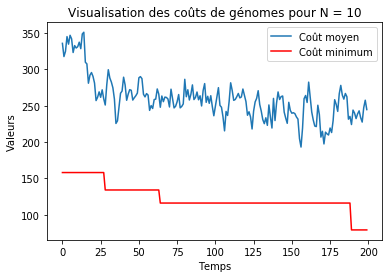

In [61]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, 10, r0, Tm, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour N = 10")
plt.legend()
plt.show()

Coût moyen final :  229.95739999999995
Coût minimal final :  41.2


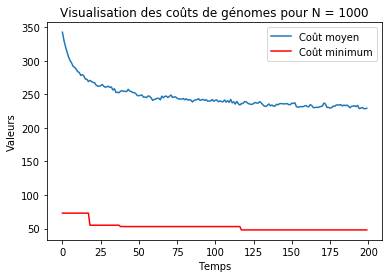

In [65]:
m_avg = [] # average of last values
m_min = []
for i in range(5) : 
    tab_avg_cost, tab_min_cost = main(T, 1000, r0, Tm, Tc)
    m_avg.append(tab_avg_cost[-1]) # last value added
    m_min.append(tab_min_cost[-1])
    
print("Coût moyen final : ", np.mean(m_avg))
print("Coût minimal final : ", np.mean(m_min))

t = np.arange(0, len(tab_avg_cost), 1)
plt.figure()
plt.plot(t, tab_avg_cost, label = "Coût moyen")
plt.plot(t, tab_min_cost, color ="red", label = "Coût minimum")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.title("Visualisation des coûts de génomes pour N = 1000")
plt.legend()
plt.show()

Le nombre de génomes N fait varier le coû minimal. Pour $N = 10$, le coût minimal est de 80, alors qu'il n'est que de 40 pour $N = 1000$. Cependant, la valeur moyenne ne varie pas du tout (232 contre 230). 

Avec $N = 1000$, le programme demande beaucoup plus de temps de calcul mais n'est pas beaucoup plus efficace. En revanche, les oscillations ne sont que très peu visibles : il y a tellement de génomes que le coût moyen varie de manière homogène. Au vu des résultats, il peut être suffisant de prendre $N = 200$ ou $N = 100$ comme proposé dans l'énoncé. 

### Conclusion et analyse

Pour la majorité des valeurs de paramètres choisies, nous observons une première phase de convergence rapide qui dure pendant environ 25 générations. 

Lorsque N est grand ou que Tm est faible, peu d'oscillations sont visibles. Cependant, un taux de mutations faible entraîne un coût moyen élevé et un nombre de génomes élevé entraîne un temps de calcul important. 


Le cout minimal varie quand à lui assez peu. Un Tc élevé diminue faiblement ce coût, mais ne parait pas réaliste. Augmenter fortement le nombre de génomes est à nouveau gage de plus faible coût (mais d'un long de temps calcul).

Enfin, r0 est déterminant car il conditionne complètement le calcul du coût des génomes et donc la qualité de notre population. Avec un r0 élevé, la population aura un coût faible très rapidement.

### Différence avec les méthodes différentielles